<a href="https://colab.research.google.com/github/Maath-Lima/data-science-studies/blob/main/Inside_a_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model

Carregar o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Exploração dos dados


Text(0.5, 1.0, '9')

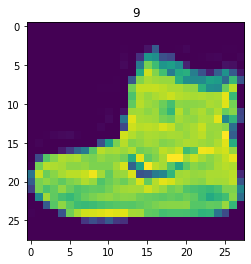

In [3]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [4]:
identificacoes_treino.min()
identificacoes_treino.max()

9

Visualizar as imagens com classificação


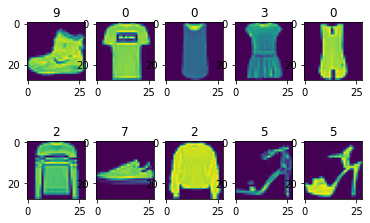

In [5]:
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(identificacoes_treino[imagem])


Visualizar as imagens com a classificação nomeada


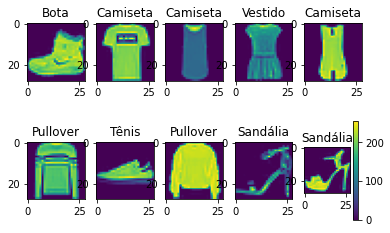

In [6]:
# Visualizar as imagens com a classificação nomeada
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 
                           'Camisa', 'Tênis', 'Bolsa', 'Bota']

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

plt.colorbar()

Normalizando as imagens

In [7]:
imagens_treino= imagens_treino/float(255)

Criação do modelo e normalizando com o dropout

In [8]:
modelo = keras.Sequential([
 keras.layers.Flatten(input_shape=(28, 28)),
 keras.layers.Dense(256, activation=tensorflow.nn.relu),
 keras.layers.Dropout(0.2),
 keras.layers.Dense(10, activation=tensorflow.nn.softmax)                 
])

Compilação do modelo

In [9]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

Treinamento do modelo

In [10]:
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5255 - accuracy: 0.8131 - val_loss: 0.4029 - val_accuracy: 0.8583
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3987 - accuracy: 0.8551 - val_loss: 0.3769 - val_accuracy: 0.8619
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3627 - accuracy: 0.8692 - val_loss: 0.3586 - val_accuracy: 0.8692
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3390 - accuracy: 0.8757 - val_loss: 0.3387 - val_accuracy: 0.8759
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3248 - accuracy: 0.8804 - val_loss: 0.3347 - val_accuracy: 0.8780


Súmario do modelo

In [19]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Pesos da primeira camada dense

In [20]:
pesos_camada_dense = modelo.layers[1].get_weights()

Salvando e carregando o modelo treinado 

In [12]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treinamento e validação por época

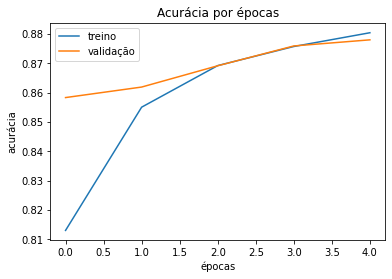

In [13]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])

plt.title('Acurácia por épocas')

plt.xlabel('épocas')
plt.ylabel('acurácia')

plt.legend(['treino', 'validação'])

Visualizado as perdas de treino e validação por época

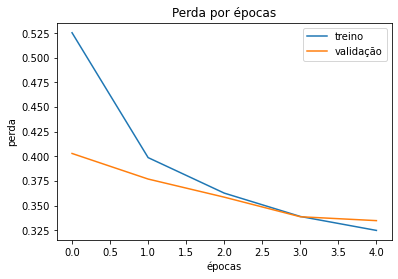

In [14]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])

plt.title('Perda por épocas')

plt.xlabel('épocas')
plt.ylabel('perda')

plt.legend(['treino', 'validação'])

Testando o modelo

In [15]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 2
número da imagem de teste: 2
resultado teste modelo salvo: 2
número da imagem de teste: 2


Avaliação do modelo

In [16]:
perde_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)

print('Perda do teste:', perde_teste)
print('Acurácia do teste:', acuracia_teste)

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)



313/313 [==============================] - 1s 2ms/step - loss: 60.8283 - accuracy: 0.8509
Perda do teste: 60.82831954956055
Acurácia do teste: 0.8508999943733215
